In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce

In [5]:
data=pd.read_csv(r"/content/drive/MyDrive/Codsoft/datasets/Credit card fraud detection/fraudTrain.csv")

In [6]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [7]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

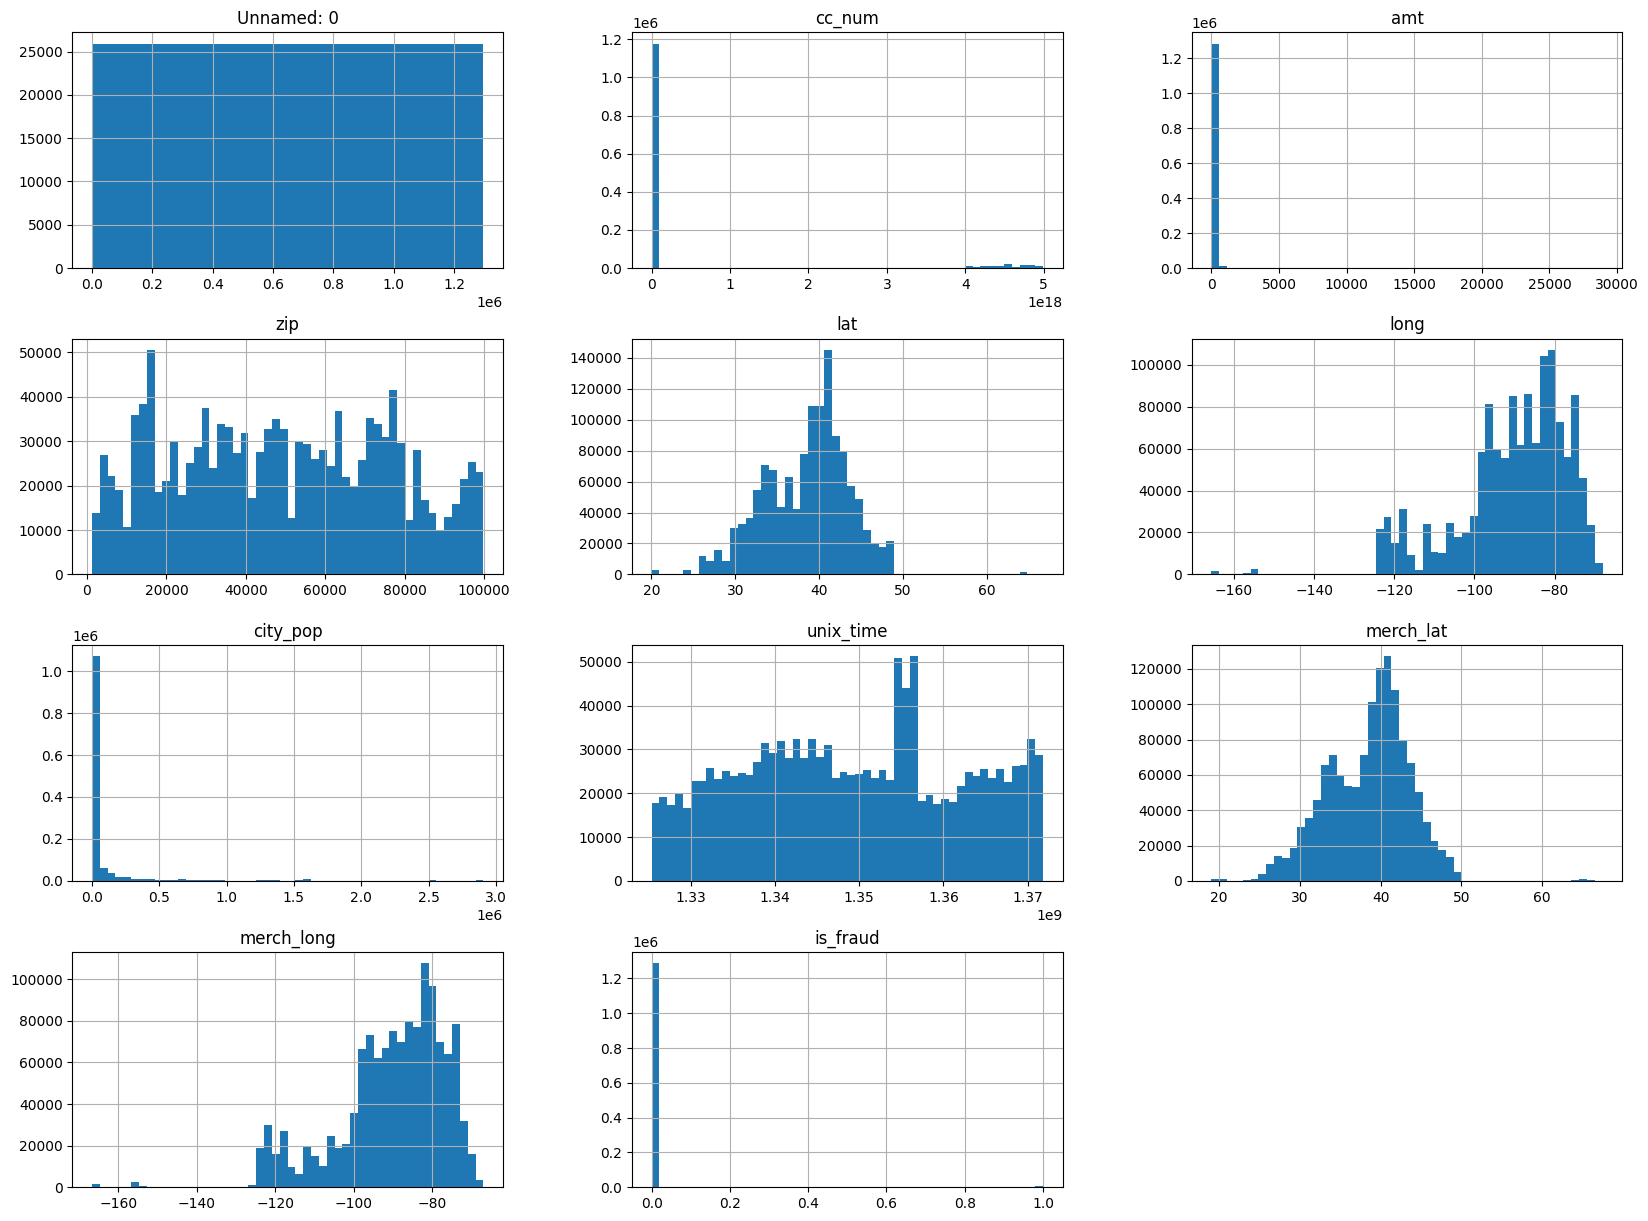

In [10]:
data.hist(bins=50,figsize=(20,15))

In [11]:
encoder = ce.OrdinalEncoder(cols=["is_fraud","gender"])

In [12]:
data1=encoder.fit_transform(data)

In [13]:
data1.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                     int64
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [14]:
data1.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [15]:
data1.drop(["Unnamed: 0"],axis=1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,2,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,2,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,2,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,2,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,1
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,2,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,1
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,2,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,1
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,2,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,1


In [16]:
data1["trans_date_trans_time"]=pd.to_datetime(data1["trans_date_trans_time"], utc=True)

In [17]:
data1["trans_date"] = data1["trans_date_trans_time"].dt.date
data1["trans_time"] = data1["trans_date_trans_time"].dt.time

In [18]:
data1.dtypes

Unnamed: 0                             int64
trans_date_trans_time    datetime64[ns, UTC]
cc_num                                 int64
merchant                              object
category                              object
amt                                  float64
first                                 object
last                                  object
gender                                 int64
street                                object
city                                  object
state                                 object
zip                                    int64
lat                                  float64
long                                 float64
city_pop                               int64
job                                   object
dob                                   object
trans_num                             object
unix_time                              int64
merch_lat                            float64
merch_long                           float64
is_fraud  

In [19]:
data1['trans_date'] = pd.to_datetime(data1['trans_date'])
data1['trans_time'] = pd.to_datetime(data1['trans_time'], format='%H:%M:%S')
data1['dob']=pd.to_datetime(data1['dob'])

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Identify and convert all object columns to integers
object_columns = data1.select_dtypes(include=['object']).columns
for column_name in object_columns:
    data1[column_name] = label_encoder.fit_transform(data[column_name])


In [21]:
data1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2019-01-01 00:00:18+00:00,2703186189652095,514,8,4.97,162,18,1,568,...,3495,370,1988-03-09,56438,1325376018,36.011293,-82.048315,1,2019-01-01,1900-01-01 00:00:18
1,1,2019-01-01 00:00:44+00:00,630423337322,241,4,107.23,309,157,1,435,...,149,428,1978-06-21,159395,1325376044,49.159047,-118.186462,1,2019-01-01,1900-01-01 00:00:44
2,2,2019-01-01 00:00:51+00:00,38859492057661,390,0,220.11,115,381,2,602,...,4154,307,1962-01-19,818703,1325376051,43.150704,-112.154481,1,2019-01-01,1900-01-01 00:00:51
3,3,2019-01-01 00:01:16+00:00,3534093764340240,360,2,45.00,163,463,2,930,...,1939,328,1967-01-12,544575,1325376076,47.034331,-112.561071,1,2019-01-01,1900-01-01 00:01:16
4,4,2019-01-01 00:03:06+00:00,375534208663984,297,9,41.96,336,149,2,418,...,99,116,1986-03-28,831111,1325376186,38.674999,-78.632459,1,2019-01-01,1900-01-01 00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08+00:00,30263540414123,499,0,15.56,121,332,2,154,...,258,215,1961-11-24,344658,1371816728,36.841266,-111.690765,1,2020-06-21,1900-01-01 12:12:08
1296671,1296671,2020-06-21 12:12:19+00:00,6011149206456997,2,1,51.70,160,463,2,856,...,100,360,1979-12-11,199896,1371816739,38.906881,-78.246528,1,2020-06-21,1900-01-01 12:12:19
1296672,1296672,2020-06-21 12:12:32+00:00,3514865930894695,599,1,105.93,74,67,2,158,...,899,308,1967-08-30,366013,1371816752,33.619513,-105.130529,1,2020-06-21,1900-01-01 12:12:32
1296673,1296673,2020-06-21 12:13:36+00:00,2720012583106919,509,1,74.90,179,304,2,433,...,1126,485,1980-08-18,1086299,1371816816,42.788940,-103.241160,1,2020-06-21,1900-01-01 12:13:36


In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [24]:
corr_matrix=data1.corr()

<ipython-input-24-a19348611765>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data1.corr()


In [25]:
corr_matrix["is_fraud"]

Unnamed: 0   -0.004767
cc_num       -0.000981
merchant     -0.000536
category      0.020205
amt           0.219404
first        -0.003219
last         -0.000096
gender        0.007642
street        0.001448
city         -0.002092
state         0.001730
zip          -0.002162
lat           0.001894
long          0.001721
city_pop      0.002136
job          -0.000093
trans_num     0.000804
unix_time    -0.005078
merch_lat     0.001741
merch_long    0.001721
is_fraud      1.000000
Name: is_fraud, dtype: float64

In [26]:
data2=data1.drop(["merchant","first","last","street","city","state","zip","lat","long","city_pop","merch_lat","merch_long","trans_date_trans_time"],axis=1)

In [27]:
data2

,Unnamed: 0,cc_num,category,amt,gender,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time
0,0,2703186189652095,8,4.97,1,370,1988-03-09,56438,1325376018,1,2019-01-01,1900-01-01 00:00:18
1,1,630423337322,4,107.23,1,428,1978-06-21,159395,1325376044,1,2019-01-01,1900-01-01 00:00:44
2,2,38859492057661,0,220.11,2,307,1962-01-19,818703,1325376051,1,2019-01-01,1900-01-01 00:00:51
3,3,3534093764340240,2,45.00,2,328,1967-01-12,544575,1325376076,1,2019-01-01,1900-01-01 00:01:16
4,4,375534208663984,9,41.96,2,116,1986-03-28,831111,1325376186,1,2019-01-01,1900-01-01 00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,0,15.56,2,215,1961-11-24,344658,1371816728,1,2020-06-21,1900-01-01 12:12:08
1296671,1296671,6011149206456997,1,51.70,2,360,1979-12-11,199896,1371816739,1,2020-06-21,1900-01-01 12:12:19
1296672,1296672,3514865930894695,1,105.93,2,308,1967-08-30,366013,1371816752,1,2020-06-21,1900-01-01 12:12:32
1296673,1296673,2720012583106919,1,74.90,2,485,1980-08-18,1086299,1371816816,1,2020-06-21,1900-01-01 12:13:36


In [51]:
data2['year'] = data2['trans_date'].dt.year
data2['month'] = data2['trans_date'].dt.month
data2['day'] = data2['trans_date'].dt.day
data2['hour'] = data2['trans_date'].dt.hour
data2['minute'] = data2['trans_date'].dt.minute
data2['second'] = data2['trans_date'].dt.second
data2['year'] = data2['dob'].dt.year
data2['month'] = data2['dob'].dt.month
data2['day'] = data2['dob'].dt.day

In [52]:
data2['trans_time'] = pd.to_datetime(data2['trans_time'], format='%Y-%m-%d %H:%M:%S')
data2['trans_time_int'] = data2['trans_time'].dt.hour * 10000 + data2['trans_time'].dt.minute * 100 + data2['trans_time'].dt.second

In [53]:
data2

,Unnamed: 0,cc_num,category,amt,gender,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,year,month,day,hour,minute,second,trans_time_int
0,0,2703186189652095,8,4.97,1,370,1988-03-09,56438,1325376018,1,2019-01-01,1900-01-01 00:00:18,1988,3,9,0,0,0,18
1,1,630423337322,4,107.23,1,428,1978-06-21,159395,1325376044,1,2019-01-01,1900-01-01 00:00:44,1978,6,21,0,0,0,44
2,2,38859492057661,0,220.11,2,307,1962-01-19,818703,1325376051,1,2019-01-01,1900-01-01 00:00:51,1962,1,19,0,0,0,51
3,3,3534093764340240,2,45.00,2,328,1967-01-12,544575,1325376076,1,2019-01-01,1900-01-01 00:01:16,1967,1,12,0,0,0,116
4,4,375534208663984,9,41.96,2,116,1986-03-28,831111,1325376186,1,2019-01-01,1900-01-01 00:03:06,1986,3,28,0,0,0,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,0,15.56,2,215,1961-11-24,344658,1371816728,1,2020-06-21,1900-01-01 12:12:08,1961,11,24,0,0,0,121208
1296671,1296671,6011149206456997,1,51.70,2,360,1979-12-11,199896,1371816739,1,2020-06-21,1900-01-01 12:12:19,1979,12,11,0,0,0,121219
1296672,1296672,3514865930894695,1,105.93,2,308,1967-08-30,366013,1371816752,1,2020-06-21,1900-01-01 12:12:32,1967,8,30,0,0,0,121232
1296673,1296673,2720012583106919,1,74.90,2,485,1980-08-18,1086299,1371816816,1,2020-06-21,1900-01-01 12:13:36,1980,8,18,0,0,0,121336


In [54]:
data3.dtypes

Unnamed: 0                 int64
cc_num                     int64
category                   int64
amt                      float64
gender                     int64
job                        int64
dob               datetime64[ns]
trans_num                  int64
unix_time                  int64
is_fraud                   int64
year                       int64
month                      int64
day                        int64
hour                       int64
minute                     int64
second                     int64
trans_time_int             int64
dtype: object

In [55]:
data3=data2.drop(["trans_date","trans_time","dob"],axis=1)

In [56]:
features=data3.drop(["is_fraud"],axis=1)

In [57]:
labels=data3["is_fraud"]

In [58]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=13)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [60]:
dtree=DecisionTreeClassifier()
forest=RandomForestClassifier()
knn=KNeighborsClassifier()
gradient=GradientBoostingClassifier()
sgd=SGDClassifier()
xgb=XGBClassifier()
classifier = LGBMClassifier()
NuSVC_Classifier=NuSVC()
svc_classifier = SVC()

In [61]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred=dtree.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy = accuracy_score(y_test,y_pred)

In [66]:
accuracy

0.9976786781575954

In [67]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
y_pred2=dtree.predict(x_test)

In [69]:
accuracy2 = accuracy_score(y_test,y_pred2)
accuracy2

0.9976786781575954

In [70]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred3=knn.predict(x_test)

In [72]:
accuracy3 = accuracy_score(y_test,y_pred3)
accuracy3

0.9956928297375981

In [73]:
gradient.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred4=gradient.predict(x_test)

In [75]:
accuracy4 = accuracy_score(y_test,y_pred4)
accuracy4

0.9955655811980643